In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas
import scipy.io as sio
from bmm import BMM
from lda import LDA
from sampleDiscrete import sampleDiscrete

In [2]:
# Data for the coursework
data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']

# Problem (a)

In [3]:
# Calculate the total number of unique words in A and B and the number of documents in A
W= np.max([np.max(A[:, 1]), np.max(B[:, 1])])
D_A = np.max(A[:, 0]) 
# Caluate the MLE estimate of the multinomial distribution parameter 
beta_MLE_multinomial = []
for i in range(1,W+1):
    beta_MLE_multinomial.append(np.sum(A[:,2][A[:,1]==i])/np.sum(A[:,2]))

beta_MLE_multinomial = np.array(beta_MLE_multinomial)

In [4]:
# Find the top 20 highest MLE estimate together with their word id
top_20_id = np.flip(np.argsort(beta_MLE_multinomial))[:20]
top_20_prob = np.flip(np.sort(beta_MLE_multinomial))[:20]

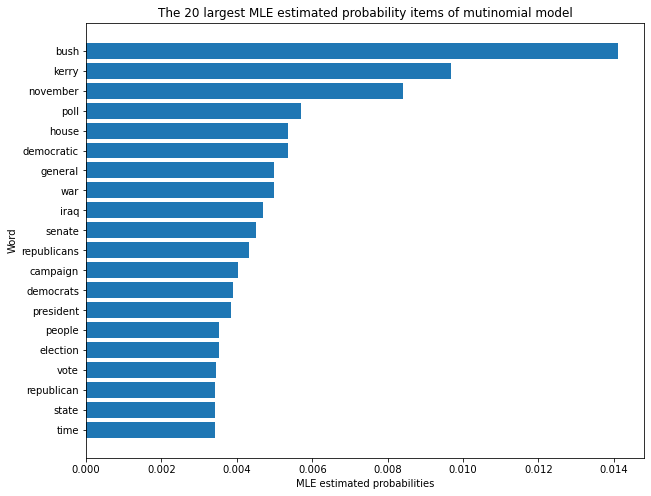

In [5]:
# barplot of the top 20 probabilities
fig = plt.figure(figsize=(10,8))
plt.barh(np.concatenate(V[np.flip(top_20_id)][:,0]),np.flip(top_20_prob))
plt.title('The 20 largest MLE estimated probability items of mutinomial model')
plt.xlabel('MLE estimated probabilities')
plt.ylabel('Word')
plt.savefig('problem_a_1.pdf')

# Problem (b)

In [6]:
# Number of word counts in the training document for each of the unique words
C = []
for i in range(1,W+1):
    C.append(np.sum(A[:,2][A[:,1]==i]))
C = np.array(C)

# posterior beta of symmetric Dirichlet prior with alpha = 0.1
alpha_small = 0.1
alpha_small_posterior = alpha_small + C

# posterior beta of symmetric Dirichlet prior with alpha = 10
alpha_large = 10
alpha_large_posterior = alpha_large + C

# Problem (c)

In [7]:
# log probability for doc ID 2001
doc_2001 = B[B[:,0]==2001]
w_2001 = doc_2001[:,1]
c_2001 = doc_2001[:,2]
lp_2001 = np.dot(c_2001, (np.log(1+C)-np.log(np.sum(1+C)))[w_2001-1])

In [8]:
# perplexity for doc ID 2001 with alpha = 1
np_2001 = np.sum(c_2001)
perplexity_2001 = np.exp(-lp_2001/np_2001)

In [9]:
# perplexity per document with alpha = 1
perplexity_B = []
for i in np.unique(B[:,0]):
    w_i = B[B[:,0]==i,1]
    c_i = B[B[:,0]==i,2] 
    lp_i = np.dot((np.log(1+C)-np.log(np.sum(1+C)))[w_i-1],c_i)
    np_i = np.sum(c_i)
    perplexity_B.append(np.exp(-lp_i/np_i))

In [10]:
# perplexity for B
w_B = B[:,1]
c_B = B[:,2] 
lp_B = np.dot((np.log(1+C)-np.log(np.sum(1+C)))[w_B-1],c_B)
np_B = np.sum(c_B)
perplexity_B_all = np.exp(-lp_B/np_B)

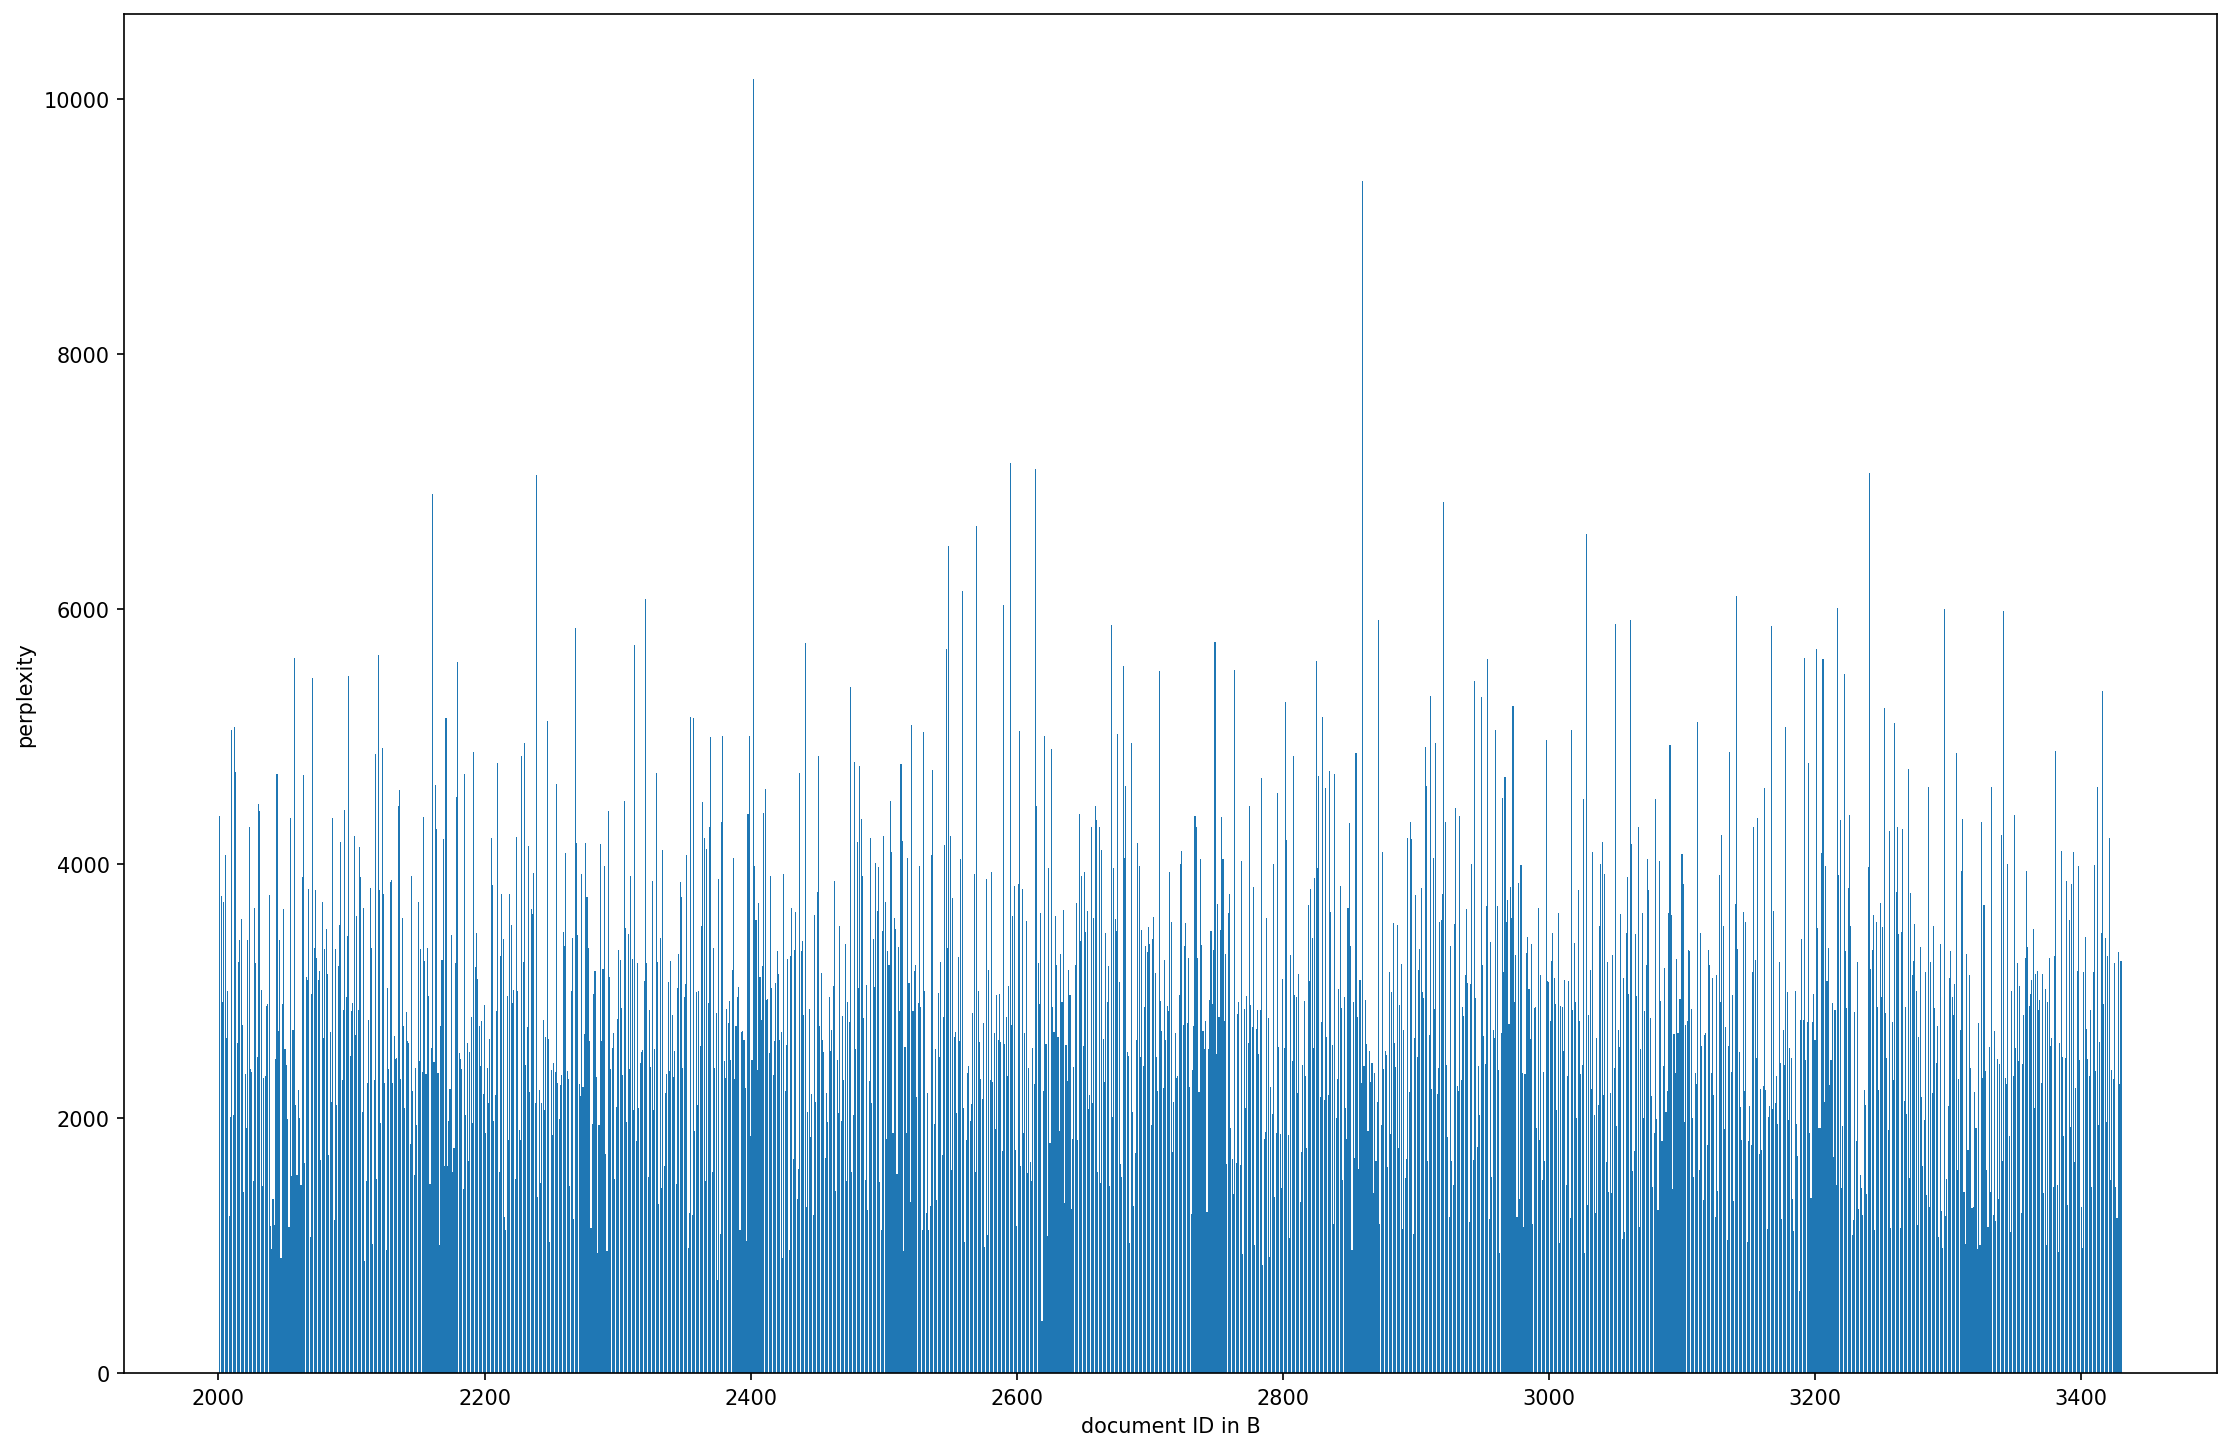

In [11]:
# Barplot for documents in B
plt.figure(figsize=(18, 12), dpi=150)
plt.bar(np.unique(B[:,0]), np.array(perplexity_B))
plt.xlabel("document ID in B")
plt.ylabel("perplexity")
plt.savefig("problem_c_barplot.pdf")

In [11]:
perplexity_2001

4373.110988104844

In [39]:
perplexity_B_all

2683.9840703508576

In [13]:
lp_2001

-3688.6211698172992

# Problem (d)

2091.976819337586


kerry
dean
edwards
clark
primary
poll
democratic
bush
gephardt
lieberman
results
percent
iowa
polls
numbers
sharpton
kucinich
undecided
state
latest


bush
jobs
tax
bunning
economy
percent
deficit
economic
administration
debate
states
budget
job
campaign
year
years
growth
billion
spending
income


kerry
bush
swift
boat
keyes
campaign
kerrys
aug
war
general
republican
republicans
john
thurlow
veterans
speech
star
zell
court
senate


kerry
dean
bush
democratic
campaign
party
edwards
media
democrats
primary
people
general
time
president
john
candidates
million
political
iowa
state


bush
film
deceits
debunking
trade
williams
fahrenheit
sanctions
early
states
moore
research
michael
july
deal
general
media
effort
monday
ditka


nader
ballot
general
republican
voters
party
election
voter
state
republicans
people
signatures
democratic
vote
gotv
ohio
naders
county
campaign
voting


november
poll
house
senate
republicans
polls
bush
governor
electoral
account
turnout
ground
d

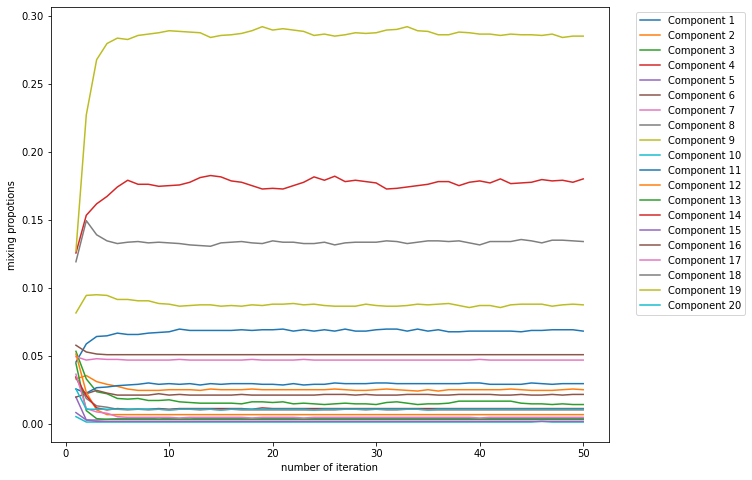

In [14]:
%run bmm.py

2147.260995964592


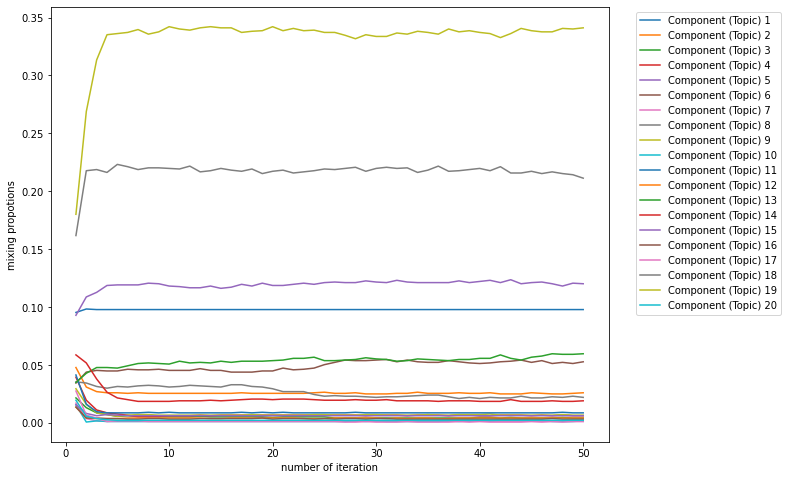

In [28]:
np.random.seed(2)
# load data
data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']
K = 20  # number of clusters
alpha = 1  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
perplexity, swk, mixing_proportions = BMM(A, B, K, alpha, gamma)
print(perplexity)
label = []
for i in range(1,K+1):
    label.append("Component (Topic) "+str(i))
fig, ax = plt.subplots(figsize=(10,8))
for i in range(20):
    ax.plot(np.linspace(1,50,50),mixing_proportions[:,i],label=label[i])
        
ax.set_xlabel("number of iteration")
ax.set_ylabel("mixing propotions")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig("problem_d_2.pdf",bbox_inches='tight')

2107.455101098583


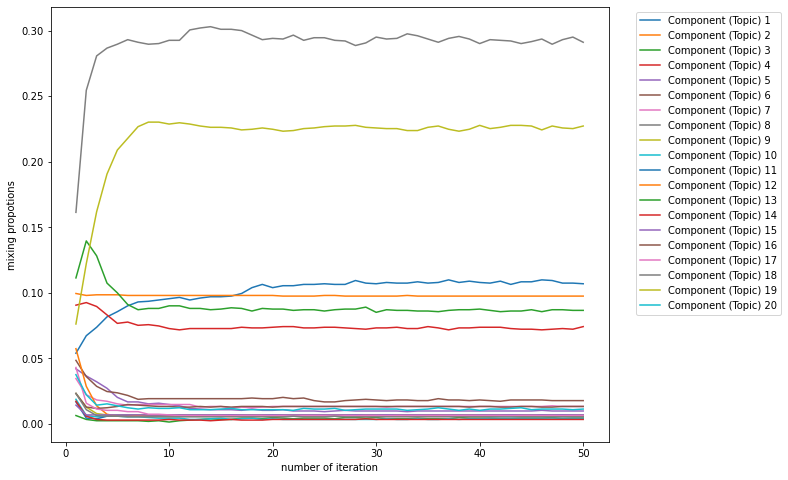

In [29]:
np.random.seed(5)
# load data
data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']
K = 20  # number of clusters
alpha = 1  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
perplexity, swk, mixing_proportions = BMM(A, B, K, alpha, gamma)
print(perplexity)
label = []
for i in range(1,K+1):
    label.append("Component (Topic) "+str(i))
fig, ax = plt.subplots(figsize=(10,8))
for i in range(20):
    ax.plot(np.linspace(1,50,50),mixing_proportions[:,i],label=label[i])
        
ax.set_xlabel("number of iteration")
ax.set_ylabel("mixing propotions")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig("problem_d_5.pdf",bbox_inches='tight')

# Problem (e)

In [17]:
%run lda.py

[1680.00019125]


media
time
press
debate
people
rove
bunning
youre
call
reporters
coverage
news
read
answer
question
piece
reason
asked
oct
campaign


bush
jobs
tax
administration
year
economy
billion
job
years
economic
health
federal
government
budget
cut
care
cuts
million
cost
white


vote
state
president
republicans
support
issue
conservative
marriage
years
gay
bush
bill
congress
reagan
voted
leadership
majority
amendment
conservatives
democrats


bush
national
house
white
administration
commission
service
bushs
guard
information
records
documents
military
war
texas
aug
air
attacks
vietnam
served


poll
percent
voters
polls
numbers
bush
polling
results
states
lead
vote
race
kerry
state
election
general
battleground
latest
leads
votes


war
iraq
troops
terrorism
country
nations
americans
bin
american
bushs
united
terrorists
attack
laden
attacks
coalition
nation
terror
government
dead


president
cheney
nader
general
ballot
presidential
campaign
vice
white
speech
florida
john
dick
li

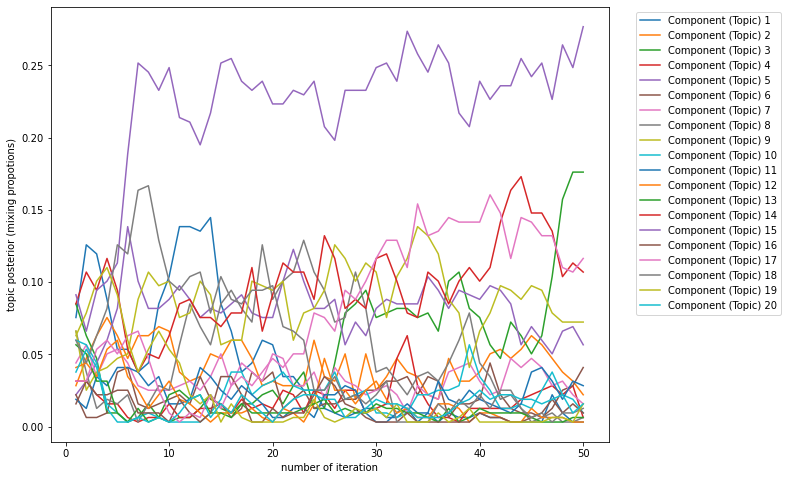

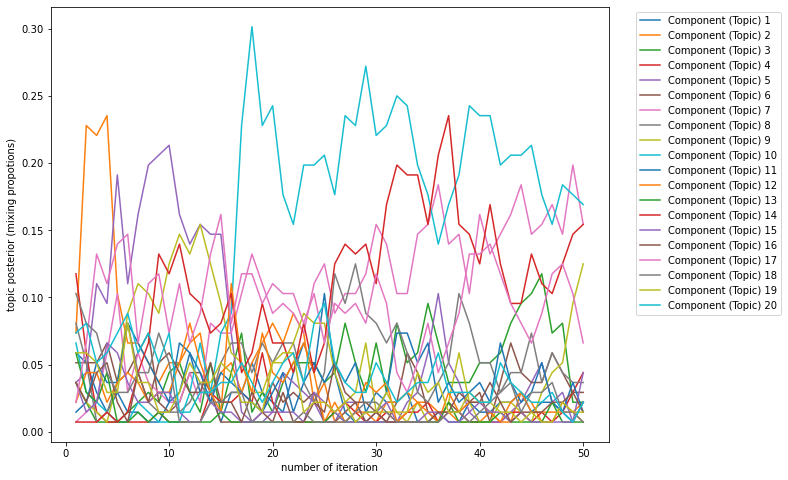

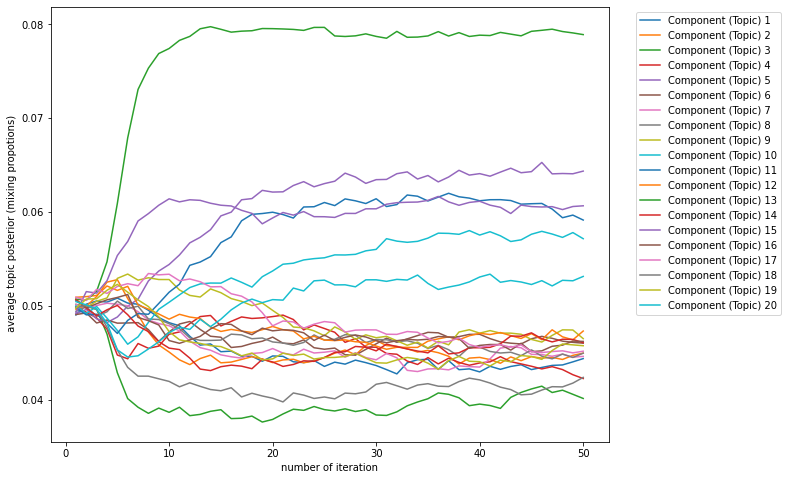

In [32]:
# Plot the theta of 1st and the 2nd document
fig, ax = plt.subplots(figsize=(10,8))
for i in range(20):
    ax.plot(np.linspace(1,50,50),theta_all[0,:,i],label=label[i])
        
ax.set_xlabel("number of iteration")
ax.set_ylabel("topic posterior (mixing propotions)")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig("problem_e_1.pdf",bbox_inches='tight')
    
fig, ax = plt.subplots(figsize=(10,8))
for i in range(20):
    ax.plot(np.linspace(1,50,50),theta_all[4,:,i],label=label[i])
        
ax.set_xlabel("number of iteration")
ax.set_ylabel("topic posterior (mixing propotions)")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig("problem_e_5.pdf",bbox_inches='tight')
    
fig, ax = plt.subplots(figsize=(10,8))
# Plot the average value of theta over time
for i in range(20):
    ax.plot(np.linspace(1,50,50),(np.sum(theta_all,axis=0)/2000)[:,i],label=label[i])
        
ax.set_xlabel("number of iteration")
ax.set_ylabel(" average topic posterior (mixing propotions)")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig("problem_e_average.pdf",bbox_inches='tight')
    
# # Calculate and Plot the average value of theta over time
# entropy = []
# beta_all = np.array(beta_all)
# beta_all
# for i in range(50):
#     beta_all[i,:,:] = (beta_all[i,:,:].copy()+gamma)/np.sum(beta_all[i,:,:].copy()+gamma,axis=0)
#     entropy.append(np.sum(beta_all[i,:,:].copy()*np.log(beta_all[i,:,:].copy()),axis=0))
# entropy = np.array(entropy)
# fig, ax = plt.subplots(figsize=(10,8))
# for i in range(20):
#     ax.plot(np.linspace(1,50,50),entropy[:,i],label=label[i])
        
# ax.set_xlabel("number of iteration")
# ax.set_ylabel("word entropy")
# ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.savefig("problem_e_entropy.pdf",bbox_inches='tight')
# print(perplexity)

2091.976819337586


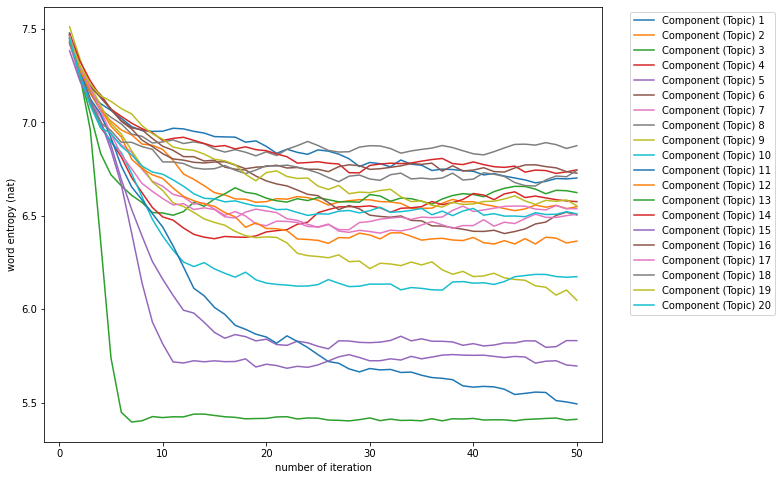

In [33]:
# Plot the entropy over time
fig, ax = plt.subplots(figsize=(10,8))
for i in range(20):
    ax.plot(np.linspace(1,50,50),entropy[:,i],label=label[i])
        
ax.set_xlabel("number of iteration")
ax.set_ylabel("word entropy (nat)")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig("problem_e_entropy.pdf",bbox_inches='tight')
print(perplexity)

In [47]:
entropy[:,4]

array([7.43368764, 7.25787789, 7.12639446, 7.00241978, 6.87852599,
       6.69408554, 6.53322354, 6.3913349 , 6.25511102, 6.16039688,
       6.07396527, 5.9946672 , 5.97922542, 5.93010854, 5.87571993,
       5.84465243, 5.86434777, 5.85314623, 5.8303125 , 5.83949082,
       5.81100885, 5.80655622, 5.82881164, 5.82021624, 5.80140291,
       5.78778291, 5.83094357, 5.82987159, 5.82252129, 5.82078774,
       5.82385087, 5.83264386, 5.85529779, 5.83063522, 5.84162193,
       5.82878419, 5.828242  , 5.82482585, 5.80691295, 5.81569473,
       5.8032911 , 5.80828393, 5.81941234, 5.81945491, 5.83079307,
       5.83022957, 5.79597904, 5.7997411 , 5.83210496, 5.83180228])

In [ ]:
plt.

In [20]:
# import scipy.io as sio
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.sparse import coo_matrix as sparse
# from sampleDiscrete import sampleDiscrete

# def LDA_100(A, B, K, alpha, gamma):

#     """
#     Latent Dirichlet Allocation

#     :param A: Training data [D, 3]
#     :param B: Test Data [D, 3]
#     :param K: number of mixture components
#     :param alpha: parameter of the Dirichlet over mixture components
#     :param gamma: parameter of the Dirichlet over words
#     :return: perplexity, multinomial over words
#     """
#     W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
#     D = np.max(A[:, 0])  # number of documents in A

#     # A's columns are doc_id, word_id, count
#     swd = sparse((A[:, 2], (A[:, 1]-1, A[:, 0]-1))).tocsr()
#     Swd = sparse((B[:, 2], (B[:, 1]-1, B[:, 0]-1))).tocsr()

#     # Initialization
#     skd = np.zeros((K, D))  # count of word assignments to topics for document d
#     swk = np.zeros((W, K))  # unique word topic assignment counts across all documents

#     s = []  # each element of the list corresponds to a document
#     r = 0
#     for d in range(D):  # iterate over the documents
#         z = np.zeros((W, K))  # unique word topic assignment counts for doc d
#         words_in_doc_d = A[np.where(A[:, 0] == d+1), 1][0]-1
#         for w in words_in_doc_d:  # loop over the unique words in doc d
#             c = swd[w, d]  # number of occurrences for doc d
#             for i in range(c):  # assign each occurrence of word w to a doc at random
#                 k = np.floor(K*np.random.rand())
#                 z[w, int(k)] += 1
#                 r += 1
#         skd[:, d] = np.sum(z, axis=0)  # number of words in doc d assigned to each topic
#         swk += z  # unique word topic assignment counts across all documents
#         s.append(sparse(z))  # sparse representation: z contains many zero entries

#     sk = np.sum(skd, axis=1)  # word to topic assignment counts accross all documents
#     # This makes a number of Gibbs sampling sweeps through all docs and words, it may take a bit to run
#     num_gibbs_iters = 100
#     theta_all = np.zeros((D,num_gibbs_iters,K))
#     entropy = []
#     for iter in range(num_gibbs_iters):
#         for d in range(D):
#             z = s[d].todense()  # unique word topic assigmnet counts for document d
#             words_in_doc_d = A[np.where(A[:, 0] == d + 1), 1][0] - 1
#             for w in words_in_doc_d:  # loop over unique words in doc d
#                 a = z[w, :].copy()  # number of times word w is assigned to each topic in doc d
#                 indices = np.where(a > 0)[1]  # topics with non-zero word counts for word w in doc d
#                 np.random.shuffle(indices)
#                 for k in indices:  # loop over topics in permuted order
#                     k = int(k)
#                     for i in range(int(a[0, k])):  # loop over counts for topic k
#                         z[w, k] -= 1  # remove word from count matrices
#                         swk[w, k] -= 1
#                         sk[k] -= 1
#                         skd[k, d] -= 1
#                         b = (alpha + skd[:, d]) * (gamma + swk[w, :]) \
#                             / (W * gamma + sk)
#                         kk = sampleDiscrete(b, np.random.rand())  # Gibbs sample new topic assignment
#                         z[w, kk] += 1  # add word with new topic to count matrices
#                         swk[w, kk] += 1
#                         sk[kk] += 1
#                         skd[kk, d] += 1
                
#             theta_all[d,iter,:]=((skd[:,d].copy()+alpha)/np.sum(skd[:,d].copy()+alpha)).flatten()
#             s[d] = sparse(z)  # store back into sparse structure
#         beta_all=(swk.copy()+gamma)/np.sum(swk.copy()+gamma,axis=0)
#         entropy.append(-np.sum(beta_all.copy()* np.log(beta_all.copy()),axis=0))
    
#     entropy_np = np.array(entropy)
#     # compute the perplexity for all words in the test set B
#     # We need the new Skd matrix, derived from corpus B
#     lp, nd = 0, 0
#     unique_docs_in_b = np.unique(B[:, 0])
#     for d in unique_docs_in_b:  # loop over all documents in B
#         # randomly assign topics to each word in test document d
#         z = np.zeros((W, K))
#         words_in_d = B[np.where(B[:, 0] == d), 1][0]-1
#         for w in words_in_d:  # w are the words in doc d
#             c = Swd[w, d-1]
#             for i in range(c):
#                 k = np.floor(K * np.random.rand())
#                 z[w, int(k)] += 1

#         Skd = np.sum(z, axis=0)
#         # perform some iterations of Gibbs sampling for test document d
#         num_gibbs_iters = 10
#         for iters in range(num_gibbs_iters):
#             for w in words_in_d:  # w are the words in doc d
#                 a = z[w, :].copy()  # number of times word w is assigned to each topic in doc d
#                 indices = np.where(a > 0)[0]   # topics with non-zero word counts for word w in doc d
#                 np.random.shuffle(indices)
#                 for k in indices:
#                     k = int(k)
#                     for i in range(int(a[k])):
#                         z[w, k] -= 1  # remove word from count matrix for doc d
#                         Skd[k] -= 1
#                         b = (alpha + Skd) * (gamma + swk[w, :]) \
#                             / (W * gamma + sk)
#                         kk = sampleDiscrete(b, np.random.rand())
#                         z[w, kk] += 1  # add word with new topic to count matrix for doc d
#                         Skd[kk] += 1
#         b1 = ((alpha + Skd) / np.sum(alpha + Skd))[:, None]
#         b2 = (gamma + swk) / (W * gamma + sk)
#         b = np.matmul(b2,b1)
#         words_and_counts = B[np.where(B[:, 0] == d), 1:][0]
#         lp += np.dot(np.log(b[words_and_counts[:, 0]-1]).T, words_and_counts[:, 1])  # log probability, doc d
#         nd += np.sum(words_and_counts[:, 1])  # number of words, doc d

#     perplexity = np.exp(-lp/nd)  # perplexity

#     return perplexity, swk, theta_all, entropy_np


# np.random.seed(0)
# # load data
# data = sio.loadmat('kos_doc_data.mat')
# A = np.array(data['A'])
# B = data['B']
# V = data['V']

# K = 20  # number of clusters
# alpha = 1  # parameter of the Dirichlet over mixture components
# gamma = .1  # parameter of the Dirichlet over words

# perplexity_100, swk_100, theta_all_100, entropy_100 = LDA_100(A, B, K, alpha, gamma)
# print(perplexity)


In [21]:
# fig, ax = plt.subplots(figsize=(10,8))
# for i in range(20):
#     ax.plot(np.linspace(1,100,100),theta_all_100[4,:,i],label=label[i])
        
# ax.set_xlabel("number of iteration")
# ax.set_ylabel("topic posterior (mixing propotions)")
# ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.savefig("problem_e_2.pdf",bbox_inches='tight')